In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [19]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

data = yf.download('AAPl', start=start, end=end)
print(data.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465666  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362817  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351057  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393282  447610800


In [20]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908981,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733620,144114400


In [21]:
data =data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362817,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393282,447610800


In [22]:
data = data.drop(['Date','Adj Close'], axis =1)
data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [23]:
plt.plot
(data.Close)

0        7.643214
1        7.656429
2        7.534643
3        7.520714
4        7.570714
          ...    
2510    71.000000
2511    71.067497
2512    72.477501
2513    72.449997
2514    72.879997
Name: Close, Length: 2515, dtype: float64

In [24]:
data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [25]:
ma100 = data.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

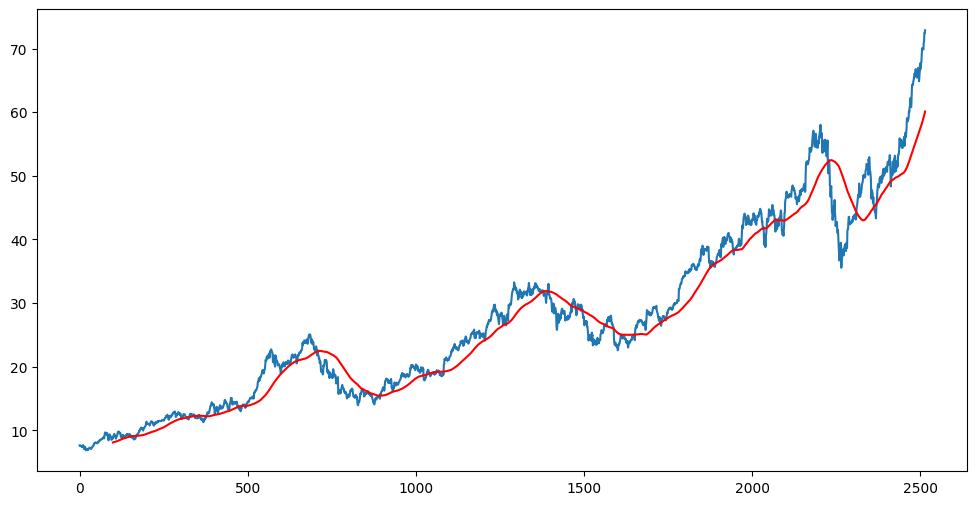

In [26]:
plt.figure(figsize= (12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

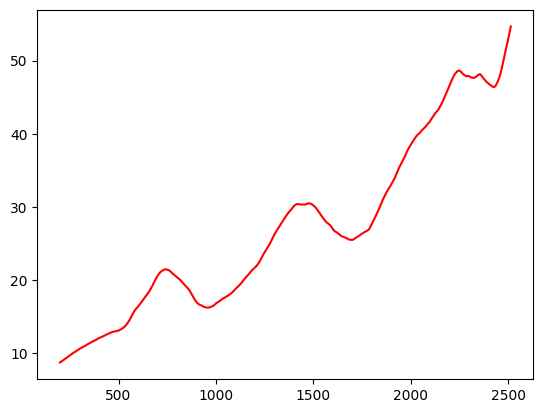

In [27]:
ma200 = data.Close.rolling(200).mean()
ma200
plt.plot(ma200,'r')

In [30]:
data.shape

(2515, 5)

In [36]:
#spliting data into training and testing
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [38]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [40]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [48]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [57]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [56]:
data_training_array.shape

(1760, 1)

In [58]:
#ML model

In [ ]:
from keras.layers import Dense, Droupout, LSTM
from keras.models import Sequential

In [66]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Create the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1)) 

In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - loss: 0.1438
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0170
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0143
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0109
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0106
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0107
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0083
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0090
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0095
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0084
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0079
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0082
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0078
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0074
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - l

In [72]:
model.save('my_model.keras')

In [74]:
#Predicting the data from testing data
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [77]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [78]:
past_100_days = data_training.tail(100)

In [80]:
final_data = pd.concat([past_100_days, data_testing], ignore_index=True)

In [81]:
final_data.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [82]:
#applying scalling on the final_data
input_data = scaler.fit_transform(final_data)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [83]:
input_data.shape

(855, 1)

In [85]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [86]:
#making predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [87]:
y_predicted.shape

(755, 1)

In [88]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [89]:
y_predicted

array([[0.10837393],
       [0.1095185 ],
       [0.11049041],
       [0.1112431 ],
       [0.11175175],
       [0.11201736],
       [0.11202885],
       [0.11186241],
       [0.11160204],
       [0.11131909],
       [0.11106727],
       [0.11085594],
       [0.11070916],
       [0.11060993],
       [0.11053997],
       [0.11046402],
       [0.11036912],
       [0.11023927],
       [0.110081  ],
       [0.1099124 ],
       [0.10975623],
       [0.10961887],
       [0.10949185],
       [0.10945845],
       [0.109659  ],
       [0.11014158],
       [0.11092508],
       [0.11204004],
       [0.11351039],
       [0.1152567 ],
       [0.11727518],
       [0.11953014],
       [0.12199953],
       [0.12468365],
       [0.12756203],
       [0.13059118],
       [0.13373518],
       [0.13696763],
       [0.1402697 ],
       [0.14362437],
       [0.14700519],
       [0.15039682],
       [0.15381241],
       [0.15727253],
       [0.16080686],
       [0.16443689],
       [0.16814908],
       [0.171

In [90]:
#scalling up the data again
scaler.scale_

array([0.02123255])

In [103]:
# Assuming you have the scale factor
scale_factor = 1 / 0.02123255

# Scale back the predictions and the actual values
y_test1 = y_test1 * scale_factor
y_predicted1 = y_predicted1 * scale_factor

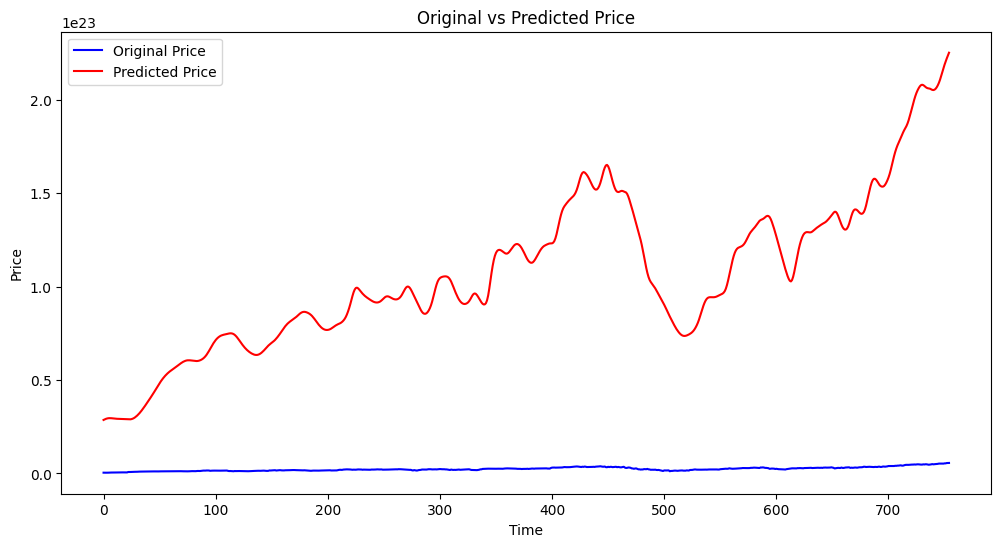

In [114]:
import matplotlib.pyplot as plt

# Assuming y_test1 and y_predicted1 are already scaled back

plt.figure(figsize=(12, 6))
plt.plot(y_test1, color='blue', label='Original Price')
plt.plot(y_predicted1, color='red', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Original vs Predicted Price')
plt.legend()
plt.show()


In [105]:
print("Original Prices:", y_test1[:5])
print("Predicted Prices:", y_predicted1[:5])


Original Prices: [16729019.93995585 15609647.69166507 16015574.51036766 15855658.82648428
 16581407.62823041]
Predicted Prices: [[1.1828017e+09]
 [1.1952937e+09]
 [1.2059012e+09]
 [1.2141160e+09]
 [1.2196673e+09]]


Original Prices Sample: [4.04998351e+20 3.77899100e+20 3.87726316e+20 3.83854864e+20
 4.01424756e+20 4.40137907e+20 4.72299354e+20 4.75872949e+20
 4.94931668e+20 4.80042030e+20 4.73788409e+20 5.02376487e+20
 5.02078631e+20 4.95825010e+20 5.02376487e+20 5.04758884e+20
 5.01483146e+20 5.58361447e+20 5.60148358e+20 5.60445987e+20
 5.50916627e+20 5.42578466e+20 7.62945163e+20 7.56393685e+20
 7.72772379e+20 8.08805050e+20 8.45731517e+20 8.60918785e+20
 8.72235055e+20 8.63301181e+20 8.98142881e+20 9.49661358e+20
 9.64252913e+20 9.59488574e+20 9.70506761e+20 9.99690325e+20
 1.01189994e+21 9.94627903e+20 9.98499354e+20 1.00653943e+21
 1.00832657e+21 1.09170818e+21 1.06699178e+21 1.09141055e+21
 1.07830760e+21 1.08366810e+21 1.06818275e+21 1.05865317e+21
 1.07235183e+21 1.07413852e+21]
Predicted Prices Sample: [[2.8634841e+22]
 [2.8937265e+22]
 [2.9194067e+22]
 [2.9392939e+22]
 [2.9527333e+22]
 [2.9597517e+22]
 [2.9600553e+22]
 [2.9556577e+22]
 [2.9487778e+22]
 [2.9413018e+22]
 [2.9346480e+22]


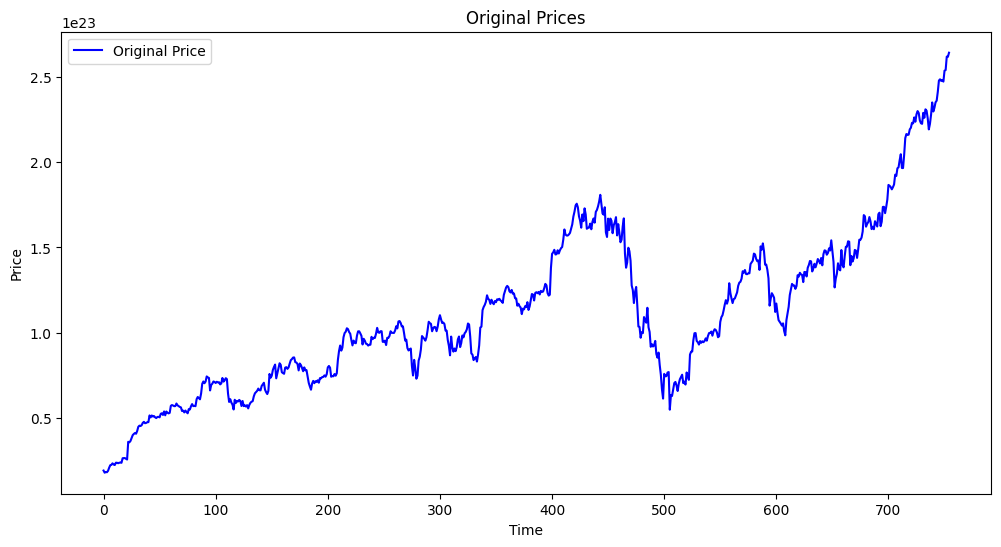

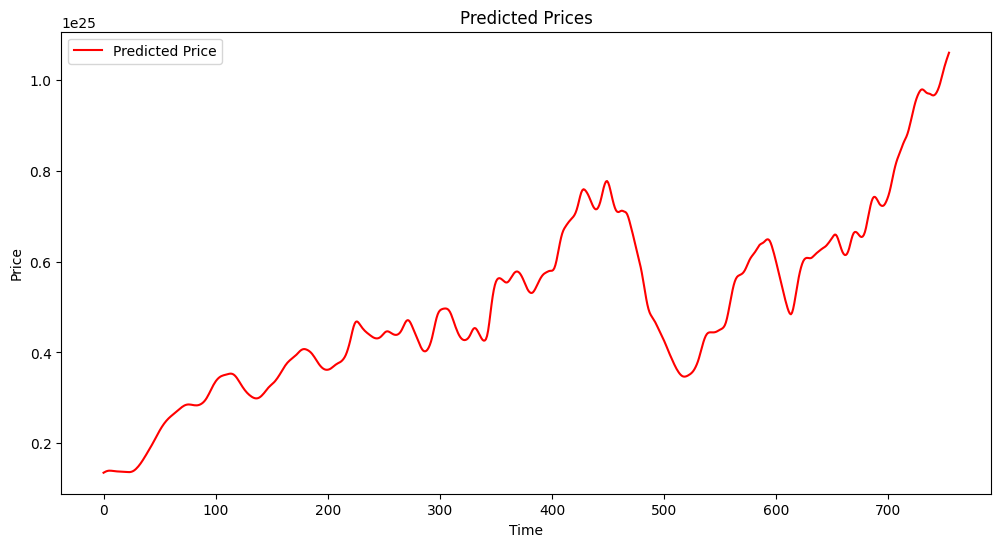

In [115]:
# Example: Replace with your actual data arrays
# y_test1 and y_predicted1 should be defined here

# Check the first 50 values
print("Original Prices Sample:", y_test1[:50])
print("Predicted Prices Sample:", y_predicted1[:50])

# Check for NaN values
print("NaN Values in Original Prices:", np.isnan(y_test1).sum())
print("NaN Values in Predicted Prices:", np.isnan(y_predicted1).sum())

# Scale back the values if not done already
scale_factor = 1 / 0.02123255
y_test1 = y_test1 * scale_factor
y_predicted1 = y_predicted1 * scale_factor

# Plotting the original prices
plt.figure(figsize=(12, 6))
plt.plot(y_test1, color='blue', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Original Prices')
plt.legend()
plt.show()

# Plotting both original and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_predicted1, color='red', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted Prices')
plt.legend()
plt.show()
